In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_data=np.array(train_df)# ,dtype='float32')
test_data=np.array(test_df)# ,dtype='float32')

In [4]:
x_train= train_data[:,1:]/255
y_train= train_data[:,0]

x_test= test_data[:,1:]/255
y_test= test_data[:,0]

In [5]:
x_train.shape , y_train.shape

((60000, 784), (60000,))

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

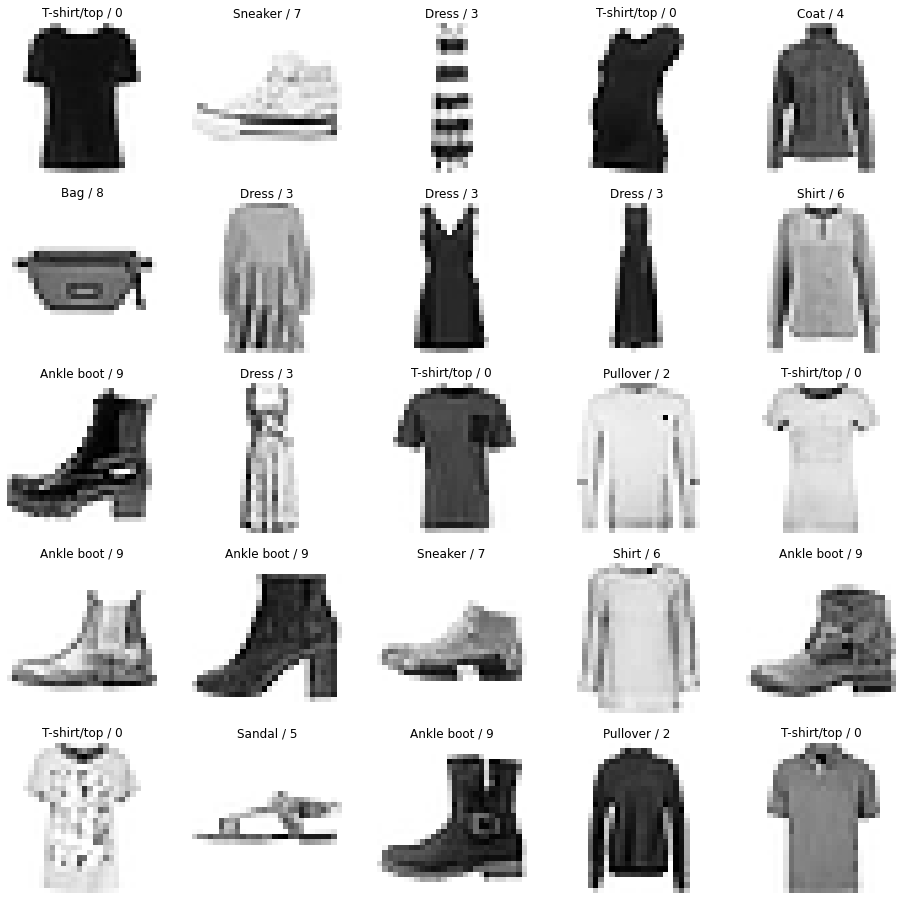

In [7]:
## Visualization
plt.figure(figsize=(16,16))
j = 1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j); j+=1
  plt.imshow((x_train[i].reshape((28,28))),cmap = 'Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_names[y_train[i]],y_train[i]))

In [8]:
## data split
x_train,x_validate,y_train,y_validate=train_test_split(
    x_train,y_train,test_size=0.2)

In [9]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows,im_cols,1)

x_train= x_train.reshape(x_train.shape[0],*im_shape)
x_test= x_test.reshape(x_test.shape[0],*im_shape)
x_validate= x_validate.reshape(x_validate.shape[0],*im_shape)

In [10]:
print('x train shape:',format(x_train.shape))
print('x test shape:',format(x_test.shape))
print('x validate shape:',format(x_validate.shape))

x train shape: (48000, 28, 28, 1)
x test shape: (10000, 28, 28, 1)
x validate shape: (12000, 28, 28, 1)


In [11]:
## CNN model
cnn_model= Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    
    Flatten(),
    Dense(32,activation='relu'),
    Dense(10,activation='softmax')
])

In [12]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                173088    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
__________________________________________________

In [13]:
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [39]:
history=cnn_model.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=10, verbose=1,
    validation_data=(x_validate, y_validate),
)

Epoch 1/10
94/94 [==============================] - 13s 135ms/step - loss: 0.1994 - accuracy: 0.9292 - val_loss: 0.2569 - val_accuracy: 0.9122
Epoch 2/10
94/94 [==============================] - 16s 165ms/step - loss: 0.1982 - accuracy: 0.9296 - val_loss: 0.2528 - val_accuracy: 0.9109
Epoch 3/10
94/94 [==============================] - 20s 212ms/step - loss: 0.1935 - accuracy: 0.9309 - val_loss: 0.2548 - val_accuracy: 0.9100
Epoch 4/10
94/94 [==============================] - 16s 170ms/step - loss: 0.1931 - accuracy: 0.9311 - val_loss: 0.2496 - val_accuracy: 0.9128
Epoch 5/10
94/94 [==============================] - 15s 159ms/step - loss: 0.1874 - accuracy: 0.9327 - val_loss: 0.2484 - val_accuracy: 0.9139
Epoch 6/10
94/94 [==============================] - 15s 162ms/step - loss: 0.1834 - accuracy: 0.9339 - val_loss: 0.2599 - val_accuracy: 0.9097
Epoch 7/10
94/94 [==============================] - 15s 164ms/step - loss: 0.1832 - accuracy: 0.9322 - val_loss: 0.2648 - val_accuracy: 0.9073

In [40]:
## Accuracy of trainnig data sets
score = cnn_model.evaluate(x_train, y_train, verbose=1)

print('train loss: {:.4f}'.format(score[0]))
print('train acc: {:.4f}'.format(score[1]))

1500/1500 [==============================] - 6s 4ms/step - loss: 0.1536 - accuracy: 0.9465
train loss: 0.1536
train acc: 0.9465


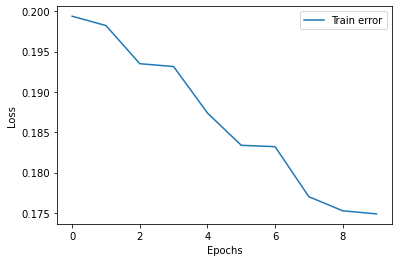

In [42]:
loss = history.history['loss']
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

In [43]:
## Accuracy for Validation data sets
score = cnn_model.evaluate(x_validate, y_validate, verbose=1)

print('Validation loss: {:.4f}'.format(score[0]))
print('Validation acc: {:.4f}'.format(score[1]))

375/375 [==============================] - 3s 7ms/step - loss: 0.2574 - accuracy: 0.9096
Validation loss: 0.2574
Validation acc: 0.9096


In [44]:
predictions=cnn_model.predict(x_test).round(2)
predictions

array([[1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.02, 0.  , 0.51, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 0.92, 0.  , ..., 0.  , 0.01, 0.  ]], dtype=float32)

T-shirt/top


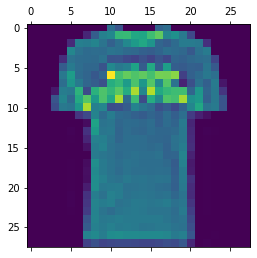

In [45]:
print(class_names[np.argmax(predictions[9])])
plt.matshow(x_test[9])

In [46]:
## Accuracy for test data sets
score = cnn_model.evaluate(x_test, y_test, verbose=0)

print('test loss: {:.4f}'.format(score[0]))
print('test acc: {:.4f}'.format(score[1]))

test loss: 0.2435
test acc: 0.9151


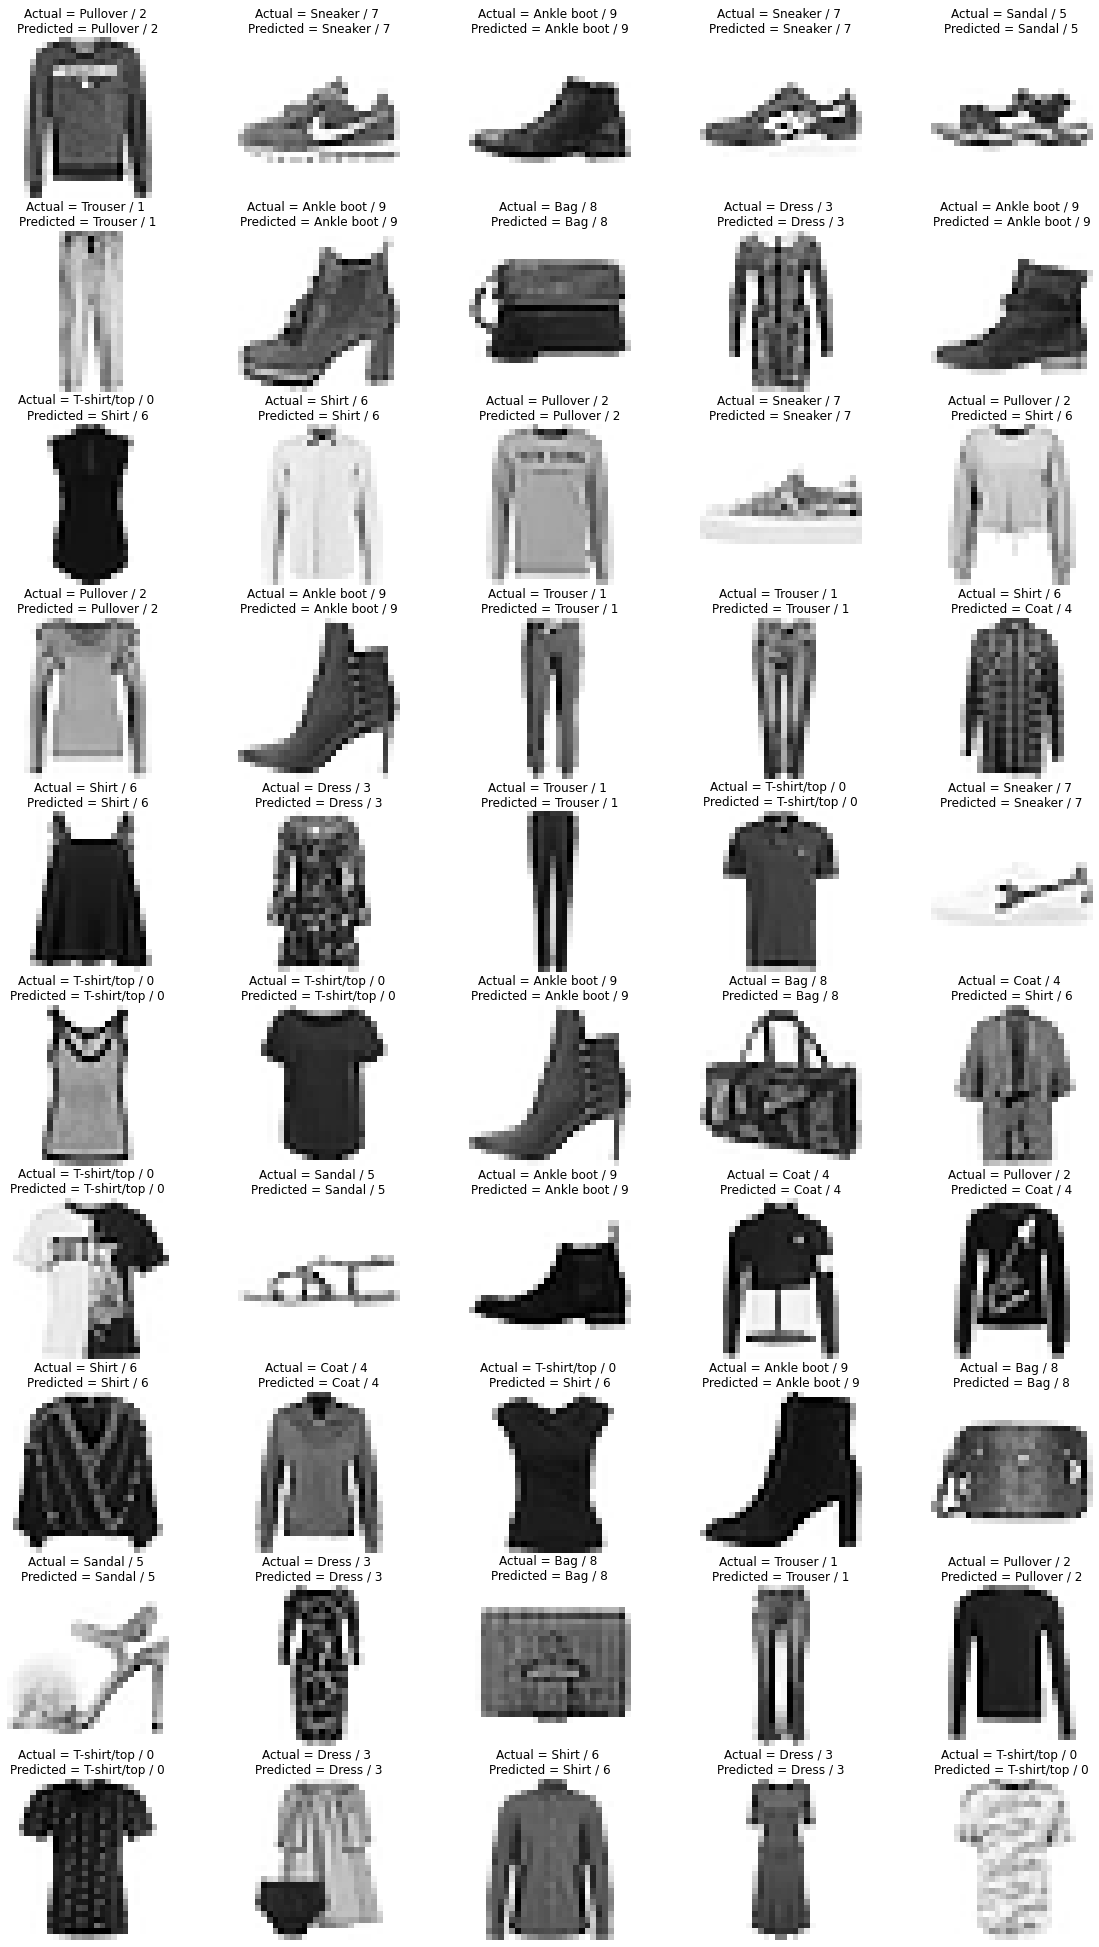

In [47]:
plt.figure(figsize=(20,35))
j = 1
for i in np.random.randint(0,1000,50):
  plt.subplot(10,5,j); j+=1
  plt.imshow((x_test[i].reshape((28,28))),cmap = 'Greys')
  plt.axis('off')

  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_names[y_test[i]], y_test[i], 
     class_names[np.argmax(predictions[i])],np.argmax(predictions[i])))

<AxesSubplot:>

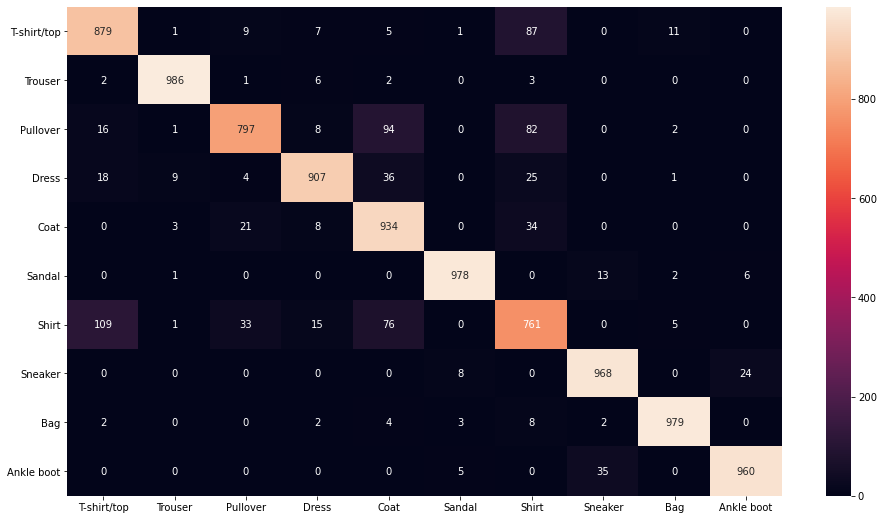

In [48]:
## confusion matrix

plt.figure(figsize=(16,9))
predictions_labels = [ np.argmax(label) for label in predictions ]
predictions_labels
cm = confusion_matrix(y_test, predictions_labels)

sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_names, yticklabels=class_names)